### Module 5: Advanced Machine Learning & Deep Learning – Python Workbook

Part 1: Neural Networks with TensorFlow/Keras

Concepts Covered:

Artificial Neural Networks (ANN)

Layers: Input, Hidden, Output

Activation functions: relu, sigmoid, softmax

Loss functions: mse, binary_crossentropy, categorical_crossentropy

Optimizers: adam, sgd

Exercise 1: Build a simple ANN to predict house prices.

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Sample daataset
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([150, 200, 250, 300, 350])  # Prices

# Build model 
model = Sequential()
model.add(Dense(10, input_dim=1, activation ='relu')) #Hidden layers
model.add(Dense(1)) # Output layer for regression

#Compile model 
model.compile(optimizer='adam', loss='mean_squared_error')

#train model 
model.fit(X,y, epochs=500, verbose =0)

# Predict
print("Predicted price for 6k sqft:", model.predict(np.array([[6]]))[0][0])

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted price for 6k sqft: 14.222577


Part 2: Classification with Neural Networks

Exercise 2: Predict if a student passes (score ≥50) using ANN.

In [3]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dataset
data = {"Score":[45,50,70,30,80,55,60,40,90,35],
        "Passed":[0,1,1,0,1,1,1,0,1,0]}
df = pd.DataFrame(data)
X = df[["Score"]]
y = df["Passed"]

# Build model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=200, verbose=0)

# Predict
preds = model.predict(pd.DataFrame({"Score":[65,42,78]}))
print("Predicted probabilities:", preds)
print("Predicted classes:", (preds>0.5).astype(int))


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted probabilities: [[1.       ]
 [0.9999965]
 [1.       ]]
Predicted classes: [[1]
 [1]
 [1]]


Part 3: Convolutional Neural Networks (CNN) for Images

Concepts:

Convolutional layers: detect features

Pooling layers: reduce dimensionality

Flatten + Dense: classification

Mini Project 2: MNIST digit recognition

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8648 - loss: 0.4714 - val_accuracy: 0.9797 - val_loss: 0.0780
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9779 - loss: 0.0785 - val_accuracy: 0.9828 - val_loss: 0.0626
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9861 - loss: 0.0489 - val_accuracy: 0.9842 - val_loss: 0.0567
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9891 - loss: 0.0361 - val_accuracy: 0.9862 - val_loss: 0.0540
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9928 - loss: 0.0263 - val_accuracy: 0.9867 - val_loss: 0.0539
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0534
Test Accuracy: 0.9851999878883362


Part 4: Natural Language Processing (NLP)

Concepts:

Text preprocessing: tokenization, stopword removal, stemming

Bag-of-Words / TF-IDF

Text classification

Exercise 3: Sentiment analysis on short text dataset

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample text data
texts = ["I love Python","I hate bugs","Machine Learning is fun","Debugging is boring"]
labels = [1,0,1,0]  # 1=positive, 0=negative

# Convert to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Train classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


Part 5: Time Series Forecasting

Concepts:

Predict future values based on historical data

Use pandas for dates, statsmodels or Prophet for forecasting

Exercise 4: Forecast stock prices (synthetic example)

In [7]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 6.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 6.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 6.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pc\AppData\Local\

2026-04-11    107.470945
2026-04-12    107.480027
2026-04-13    107.550950
2026-04-14    107.673170
2026-04-15    107.830212
2026-04-16    108.001866
2026-04-17    108.166762
2026-04-18    108.305012
2026-04-19    108.400587
2026-04-20    108.443151
Freq: D, Name: predicted_mean, dtype: float64


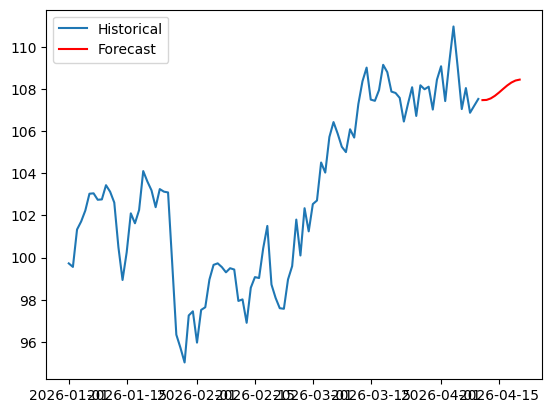

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Synthetic stock data
dates = pd.date_range(start='2026-01-01', periods=100)
prices = np.cumsum(np.random.randn(100)) + 100
df = pd.DataFrame({"Date":dates, "Price":prices})
df.set_index('Date', inplace=True)

# Train ARIMA model
model = ARIMA(df['Price'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot
plt.plot(df['Price'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


Part 6: Model Evaluation & Hyperparameter Tuning

Concepts:

Use sklearn.metrics for regression & classification

GridSearchCV for tuning hyperparameters

Exercise 5: Optimize a Decision Tree classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Dataset
X = [[0],[1],[2],[3],[4],[5]]
y = [0,0,1,1,1,0]

# Grid search
param_grid = {'max_depth':[1,2,3], 'criterion':['gini','entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid.fit(X, y)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'criterion': 'gini', 'max_depth': 1}
Best score: 0.6666666666666666
